In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy import stats

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading The data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SAM/revenue.csv')
df.head(2)

,session_id,transactions,revenue
0,2.724240e+36,1,74.990555
1,8.444120e+36,1,-83.416461


In [ ]:
#calculate the converted users
df['revenue'].mean()

26369.07733947988

In [ ]:
df.isnull().sum().sum()

0

# A/B testing
- control: 11886 sessions, 1052 conversions.                         
- variant: 11900 sessions, 1133 conversions.

In [ ]:
# Explanation :
## the Null hypothesis states there control is better 

## the alternative hypothesis states variant is better


In [ ]:
n_control= 1052
n_variant =1133

In [ ]:
# control probabilty
p_control =1052/11886
p_control

0.08850748780077403

In [ ]:
# variant probabilty
p_variant =1133 /11900
p_variant

0.09521008403361345

In [ ]:
p_variant - p_control

0.0067025962328394195

Simulate $n-control$ with a convert rate of $p-contro$ under the null.

In [ ]:
p_control_converted = np.random.binomial(1,p_control,n_control)
p_control_converted.mean()

0.094106463878327

Simulate  $n−variant$  with a convert rate of  $p−variant$  under the null.

In [ ]:
p_variant_converted = np.random.binomial(1,p_variant,n_variant)
p_variant_converted.mean()

0.10767872903795234

Find  $p-control$  -  $p-variant$  for your simulated values

In [ ]:
p_control_converted.mean() - p_variant_converted.mean()

-0.01357226515962534

 Simulate 10,000  $p-control$  -  $p-varaiant$  values using this same process similarly to the one you calculated 

In [ ]:
# run simulation 10000 times
p_diffs = []

for _ in range(10000):
    p_variant_converted =  np.random.binomial(1,p_variant,n_variant).mean()
    p_control_converted =   np.random.binomial(1,p_control,n_control).mean()
    p_diffs.append(p_control_converted- p_variant_converted)

 Plot a histogram of the p_diffs. Does this plot look like what you expected

Text(0.5, 1.0, 'Simulated Difference of Variant & control converted under the Null')

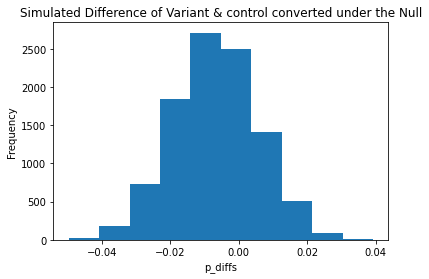

In [ ]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# plot sampling distribution
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference of Variant & control converted under the Null')

What proportion of the p_diffs are greater than the actual difference observed between Control and Variant


In [ ]:
obs_diff =p_control - p_variant
obs_diff

-0.0067025962328394195

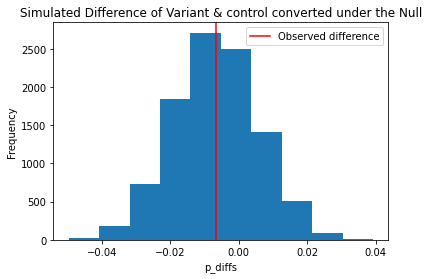

In [ ]:
# plot line for observed statistic
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='r', label="Observed difference")
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference of Variant & control converted under the Null');
plt.legend()
plt.show()

In [ ]:
#calculate the proportion of p_diffs greater than the observe difference
(p_diffs > obs_diff).mean()

0.4989


1- 50.59% is the proportion of the p_diffs that are greater than the actual difference observed.

2- 50.59% is the proportion of the p_diffs that are greater than the actual difference observed. In scientific studies, this value is also called the p-value.

3- This value means that we cannot reject the null hypothesis and that we do not have sufficient evidence that the  $CONTROL$  has a higher conversion rate than the  $Variant$

# Converting POSIX time format to human rediable format 

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/SAM/info.csv')
df2.head(2)

,session_id,channel,device,visit_time,country
0,6721837803725769317162514800620210701,Organic Search,desktop,1625148006,Singapore
1,8225818815437268011162508906720210701,Affiliates,mobile,1625089067,Sweden


In [ ]:
import datetime
datetime.datetime.fromtimestamp(1625148006).strftime('%Y-%m-%d %H:%M:%S')


'2021-07-01 14:00:06'

In [ ]:
df2.shape

(22000, 5)

In [ ]:
dat =df2.visit_time
dat

0        1625148006
1        1625089067
2       -1625157567
3        1625131541
4        1625087750
            ...    
21995    1625122715
21996    1625099274
21997    1625116638
21998    1625155592
21999    1625086888
Name: visit_time, Length: 22000, dtype: int64

In [ ]:
time=[]
for i in range(22000):
   t = datetime.datetime.fromtimestamp(dat[i]).strftime('%Y-%m-%d %H:%M:%S')
   time.append(t)

  



In [ ]:
time

['2021-07-01 14:00:06',
 '2021-06-30 21:37:47',
 '1918-07-03 07:20:33',
 '2021-07-01 09:25:41',
 '2021-06-30 21:15:50',
 '2021-07-01 02:03:39',
 '2021-07-01 07:32:05',
 '2021-07-01 09:09:48',
 '2021-07-01 14:14:01',
 '2021-07-01 11:48:06',
 '2021-06-30 23:40:45',
 '2021-07-01 08:47:59',
 '2021-06-30 23:23:47',
 '2021-07-01 11:41:18',
 '2021-07-01 02:40:34',
 '2021-07-01 03:13:49',
 '2021-07-01 02:18:20',
 '2021-07-01 10:01:36',
 '2021-07-01 03:32:19',
 '2021-07-01 12:02:02',
 '2021-07-01 11:49:46',
 '2021-07-01 00:42:17',
 '2021-07-01 08:23:37',
 '2021-07-01 17:50:37',
 '2021-07-01 08:53:13',
 '2021-07-01 07:04:43',
 '2021-07-01 02:45:19',
 '2021-06-30 22:08:38',
 '2021-07-01 14:21:59',
 '2021-07-01 09:54:23',
 '2021-07-01 16:59:18',
 '2021-07-01 12:01:32',
 '2021-07-01 07:32:31',
 '2021-07-01 15:34:23',
 '1918-07-03 07:20:33',
 '2021-06-30 21:40:27',
 '2021-06-30 21:04:37',
 '2021-07-01 04:43:36',
 '2021-07-01 15:31:31',
 '2021-06-30 21:05:32',
 '2021-07-01 20:59:12',
 '2021-07-01 13:

In [ ]:
time =pd.DataFrame(time)

In [ ]:
time.to_csv('time.csv')
!cp time.csv "/content/drive/MyDrive"